# 9.1P

_**Question 1: Load  "data.csv" dataset and create an ensemble ML model for predicting target variable (Result). Report the performance of the model using appropriate metrics**_

In [1]:
# Import modules

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset
df = pd.read_csv("../data/data_9.csv")

# Print dimensions
rows, cols = df.shape
print("Data has {} rows with {} columns".format(rows, cols))

df.head()

Data has 17 rows with 39 columns


,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,0,2,3,68,73,32,24,5,3.0,41,...,10,17,25.0,36.0,173,3,7.0,6.0,6.0,6.0
1,0,2,3,53,46,47,35,7,7.0,47,...,7,19,30.0,43.0,152,6,3.0,4.0,6.0,6.0
2,1,3,2,57,62,43,43,13,0.0,50,...,3,7,28.0,44.0,152,1,7.0,6.0,6.0,6.0
3,0,2,3,64,63,36,23,7,4.0,49,...,6,12,28.0,37.0,131,6,7.0,4.0,0.0,6.0
4,0,2,3,60,58,40,21,13,8.0,40,...,5,9,31.0,46.0,153,1,4.0,6.0,6.0,6.0


<Axes: xlabel='Result', ylabel='count'>

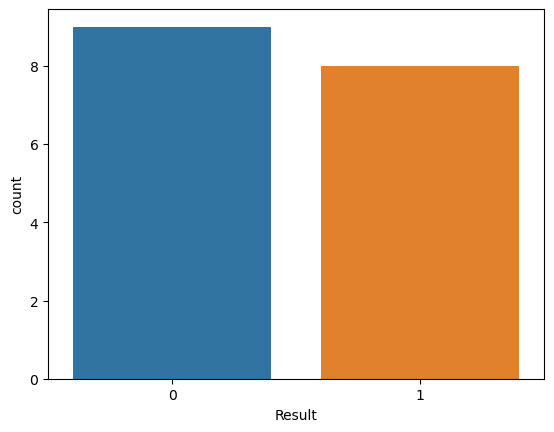

In [3]:
# Countplot for target variable
sns.countplot(x='Result', data=df)

In [4]:
# Split the data into X and y
X = df.drop('Result', axis=1)
y = df.Result

# Print the type for X and y
print ("X is of type: {}".format(type(X)))
print ("y is of type: {}".format(type(y)))

# Print the unique labels in y
print ("Unique labels: {}".format(np.unique(y)))

X is of type: <class 'pandas.core.frame.DataFrame'>
y is of type: <class 'pandas.core.series.Series'>
Unique labels: [0 1]


In [5]:
# Split the data into test and train (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the  number of samples in train and test data groups
print("Number of X_train samples: ", X_train.shape[0])
print("Number of X_test samples: ", X_test.shape[0])

## Very small sample size, could be a problem

Number of X_train samples:  13
Number of X_test samples:  4


In [6]:
# Run random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Performance metrics - choose from accuracy, precision, recall, f1-score, ROC AUC, AUC-PR, confusion matrix, feature importance, OOB error, specificity, matthews correlation coefficient
pred = rf_clf.predict(X_test)
print("Accuracy for {} estimators: {}\n".format(100, accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))

Accuracy for 100 estimators: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



Forest importances: 
 FNL1     0.085030
FNL2     0.174911
FSP.1    0.011231
FSW.1    0.004583
SSP.1    0.008577
dtype: float64


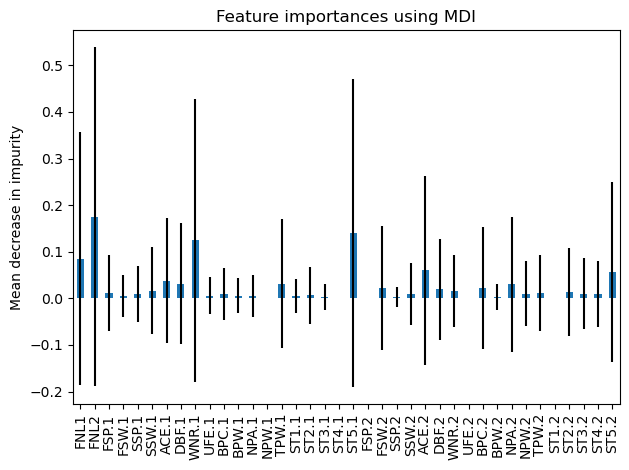

In [7]:
# Calculate feature importances
importances = rf_clf.feature_importances_ # Gini importance
# print(importances)

forest_importances = pd.Series(importances, index=list(X_train.columns))            # Associate each feature with its importance
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)    # Compute standard deviation across trees - helps to understand the variability of feature importance estimates across different trees
print("Forest importances: \n", forest_importances.head())

# Plot feature importances
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Most important features for making predictions with this model is FNL2 (0.175), followed by FNL1 (0.085) and FSP.1 (0.011)

_**Question 2: Have you used any hyperparameter tuning while building the model in Q1? If yes, then plot the performances that were obtained at different steps of optimisation. Otherwise, create an optimised model and compare performance with Q1**_

Hyperparameters used in Q1:
n_estimators - set to 100 (which also is the default value if no value is specified)
random_state - I set this value to ensure I get the same results each time I run the code.

In [8]:
# Re-run RandomForestClassifier to find the optimum number of estimators (the number of trees in the forest)

n_estimators = [10, 20, 50, 100, 500, 1000, 2000]

for n in n_estimators:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state = 42)
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    print("Accuracy for {} estimators: {:.3f}\n".format(n, accuracy_score(y_test, pred)))
    print("Classification report for {} estimators:".format(n))
    print(classification_report(y_test, pred))

## Model performs acceptably with 10 estimators (without overfitting) and approaches perfect accuracy with values over 20

Accuracy for 10 estimators: 0.750

Classification report for 10 estimators:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Accuracy for 20 estimators: 0.750

Classification report for 20 estimators:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Accuracy for 50 estimators: 1.000

Classification report for 50 estimators:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
         

In [9]:
# Re-run RandomForestClassifier to find the optimum value for criterion - function that measures the quality of a split

criterion = ['gini', 'entropy', 'log_loss']

for c in criterion:
    rf_clf = RandomForestClassifier(criterion=c, random_state = 42)
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    print("Accuracy for {} criterion: {:.3f}\n".format(c, accuracy_score(y_test, pred)))
    print("Classification report for {} criterion:".format(c))
    print(classification_report(y_test, pred))

## Model performs will with all three criterions

Accuracy for gini criterion: 1.000

Classification report for gini criterion:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy for entropy criterion: 1.000

Classification report for entropy criterion:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy for log_loss criterion: 1.000

Classification report for log_loss criterion:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00

In [10]:
# Re-run RandomForestClassifier to find the optimum value for max_features - the number of features to consider at each split

max_features = ['sqrt', 'log2', None]

for m in max_features:
    rf_clf = RandomForestClassifier(max_features=m, random_state = 42)
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    print("Accuracy for {} max_features: {:.3f}\n".format(m, accuracy_score(y_test, pred)))
    print("Classification report for {} max_features:".format(m))
    print(classification_report(y_test, pred))

## Model performs well with all three max_features values

Accuracy for sqrt max_features: 1.000

Classification report for sqrt max_features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy for log2 max_features: 1.000

Classification report for log2 max_features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy for None max_features: 1.000

Classification report for None max_features:
              precision    recall  f1-score   support

           0       1.00      1.00      

In [11]:
# Re-run RandomForestClassifier to find the optimum value for max_depth - maximum number of levels in the tree

max_depth = [2, 5, 10, 20, 40, 60, 100, 200]

for m in max_depth:
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=m, random_state = 42)
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    print("Accuracy for {} max_depth: {:.3f}\n".format(m, accuracy_score(y_test, pred)))
    print("Classification report for {} max_depth:".format(m))
    print(classification_report(y_test, pred))

## Model performs well (possibly overfit) with all tested values

Accuracy for 2 max_depth: 1.000

Classification report for 2 max_depth:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy for 5 max_depth: 1.000

Classification report for 5 max_depth:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy for 10 max_depth: 1.000

Classification report for 10 max_depth:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       

In [12]:
# Re-run RandomForestClassifier to find the optimum value for min_samples_split - minimum number of samples required to split a node

min_samples_split = [2, 5, 8, 10, 15, 20]

for m in min_samples_split:
    rf_clf = RandomForestClassifier(n_estimators=100, min_samples_split=m, random_state = 42)
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    print("Accuracy for {} min_samples_split: {:.3f}\n".format(m, accuracy_score(y_test, pred)))
    print("Classification report for {} min_samples_split:".format(m))
    print(classification_report(y_test, pred))

## Model performs best (without overfitting) with min_samples_split = 8, with performance decreasing as min_samples_split values increase

Accuracy for 2 min_samples_split: 1.000

Classification report for 2 min_samples_split:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy for 5 min_samples_split: 1.000

Classification report for 5 min_samples_split:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy for 8 min_samples_split: 0.750

Classification report for 8 min_samples_split:
              precision    recall  f1-score   support

           0       1.00    

In [13]:
# Re-run RandomForestClassifier to find the optimum value for min_samples_leaf - minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 5, 10, 15, 20]

for m in min_samples_leaf: 
    rf_clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=m, random_state = 42)
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    print("Accuracy for {} min_samples_leaf: {:.3f}\n".format(m, accuracy_score(y_test, pred)))
    print("Classification report for {} min_samples_leaf:".format(m))
    print(classification_report(y_test, pred))

## min_samples_leaf = 1 shouldn't be used (overfitting), but model performs well with min_samples_leaf=2 (), and less well with all other values tested (accuracy = 0.250)

Accuracy for 1 min_samples_leaf: 1.000

Classification report for 1 min_samples_leaf:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy for 2 min_samples_leaf: 0.750

Classification report for 2 min_samples_leaf:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Accuracy for 5 min_samples_leaf: 0.250

Classification report for 5 min_samples_leaf:
              precision    recall  f1-score   support

           0       0.00      0.00

In [14]:
# Re-run RandomForestClassifier with optimum hyperparameters (without overfitting) found above (where all tested hyperparameter values performed equally I have used the default value)

rf_clf = RandomForestClassifier(n_estimators=10, min_samples_split=8, min_samples_leaf=2, random_state = 42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print("Accuracy for {} estimators: {}\n".format(100, accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))


Accuracy for 100 estimators: 0.75

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [15]:
# RandomForestClassifier with optimum hyperparameters but possibly overfit

rf_clf = RandomForestClassifier(n_estimators = 400, min_samples_split = 5,min_samples_leaf=1,max_features='sqrt',max_depth=30)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print("Accuracy for {} estimators: {}\n".format(100, accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))

Accuracy for 100 estimators: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



_**Question 3: Reflect on the importance of hyperparameter tuning of ML models based on your ML model development exercise**_

Hyperparameter tuning is important for finding the best model and improving model accuracy and performance (i.e. improve the overall performance of the model). Finding the best suited hyperparameter values also helps to minimise overfitting a model. Overfitting occurs when a model fits the data too closely, leading to poor performance when applied to new data. Having a well fit and robust model helps to make sure the model will adapt well when presented with new data.

In this question I have tuned the model by manipulating the hyper-parameters for the n_estimators, criterion, max_features, max_depth, min_samples_split, and min_samples_leaf.I used trial-and-error by looping through different values to see which produced the best results, taking into consideration that if the resulting model is too perfect this means it is likely overfit and will not perform well when presented with new data.

These were my results for each of the parameters:

n_estimators: Model performs acceptably with 10 estimators (without overfitting) and approaches perfect accuracy (overfit) with values over 20. The values I tried were n_estimators = 10, 20, 50, 100, 500, 1000, 2000

criterion: Model performs will with all three criterion values ('gini', 'entropy', 'log_loss')

max_features: Model performs well with all three max_features values ('sqrt', 'log2', None)

max_depth: Model performs well (but may be possibly overfit) with all tested values (max_depth = 2, 5, 10, 20, 40, 60, 100, 200)

min_samples_split: Model performs best (without overfitting) with min_samples_split = 8, with performance decreasing as min_samples_split values increase. I tried values min_samples_split = 2, 5, 8, 10, 15, 20

min_samples_leaf: Model performs well with min_samples_leaf=2 (), and less well with all other values tested (accuracy = 0.250). I tried values min_samples_leaf = 1, 2, 5, 10, 15, 20. I did not try min_samples = 1 because this is more likely to lead to overfitting.

The optimum hyper-parameter values were then combined for the final tuned model, which performed too well and is possibly still overfit.

_**Question 4: Create a GradientBoost model for the predicting Result using the same dataset that you have used Q1 and report the performance.**_

In [16]:
# Import modules
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [17]:
#Import dataset
df = pd.read_csv("../data/data_9.csv")

# Split the data into X and y
X = df.drop('Result', axis=1)
y = df.Result


In [18]:
# GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc_model.fit(X_train, y_train)

y_pred = gbc_model.predict(X_test)
print("Accuracy for {} estimators: {}\n".format(100, accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy for 100 estimators: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [19]:
# AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=10, learning_rate=0.01, random_state=42)
abc.fit(X_train, y_train)

y_pred = abc.predict(X_test)
print("Accuracy for {} estimators: {}\n".format(100, accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))


Accuracy for 100 estimators: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [20]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import clear_output, display
import ipywidgets as widgets
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier

def conmat(y_test, pred):
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
    _ = ax.set_title(
        f"Confusion Matrix for {rf_clf.__class__.__name__}"
    )

def f(n_estimators,learning_rate):
    abc =AdaBoostClassifier(n_estimators=n_estimators,learning_rate=learning_rate, random_state=0)
    abc.fit(X_train, y_train)
    pred = abc.predict(X_test)
    conmat(y_test, pred)
    print('The accuracy of the RF classifier on test data is {:.2f} out of 1 '.format(abc.score(X_test, y_test)))
    
interact(f,learning_rate=np.arange(0.1,1,0.1),n_estimators=np.arange(10,800,100));


## The confusion matrix below shows that the model has correctly classified 4 out of 4 samples in the test set (three samples for class 0 and one sample for class 1, shown in yellow and teal).
## None of the samples in the test set were incorrectly classified (shown in purple).


interactive(children=(Dropdown(description='n_estimators', options=(10, 110, 210, 310, 410, 510, 610, 710), va…

_**Question 5: Compare the performance of two models (Q1 and Q4). Explain which model is good and why**_

RandomForestClassifier and AdaBoost are both ensemble learning algorithms, meaning both create models by training lots of decision trees (each with a slightly different subset of the data). These trees are then combined (in different ways depending on the model and type of data) to create the model. RandomForestClassifier and AdaBoost differ in a few ways:
- RandomForestClassifier creates a forest of decision trees whereas AdaBoost creates a forest of decision stumps (decision trees with one node and two leaves).
- RandomForestClassifier builds each tree independently, whereas AdaBoost builds each tree sequentially and adjust the weights of the misclassified samples in each iteration (to ensure misclassified samples are picked up in the next iteration)

Here, both models performed well. However, the model created using AdaBoost in question 4 runs faster than the model created using RandomForestClassifier question 1, possibly indicating greater efficiency in this case.